Saving health_risk.csv to health_risk (3).csv
Available columns: ['bmi', 'exercise_hours', 'junk_food_freq', 'risk_level']
✅ Target column detected as: risk_level

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.14      0.20      0.17         5
           2       0.62      0.50      0.56        10

    accuracy                           0.35        20
   macro avg       0.32      0.30      0.31        20
weighted avg       0.40      0.35      0.37        20



<ipython-input-12-309e6693381b>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


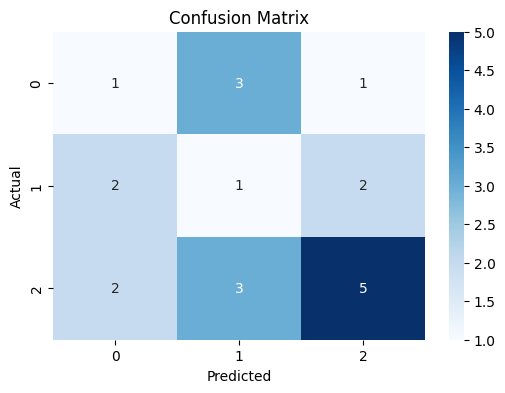

In [12]:
# STEP 1: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# STEP 3: Load CSV
df = pd.read_csv('health_risk.csv')

# STEP 4: Clean column names
df.columns = df.columns.str.strip()

# STEP 5: Print all columns to detect the actual name
print("Available columns:", df.columns.tolist())

# STEP 6: Dynamically find the target column (contains 'risk')
target_col = None
for col in df.columns:
    if 'risk' in col.lower():  # Case-insensitive match
        target_col = col
        print("✅ Target column detected as:", target_col)
        break

if not target_col:
    raise ValueError("❌ No column found related to health risk!")

# STEP 7: Fill missing values
df.fillna(method='ffill', inplace=True)

# STEP 8: Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# STEP 9: Split features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# STEP 10: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 11: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# STEP 12: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# STEP 13: Predictions
y_pred = model.predict(X_test)

# STEP 14: Evaluation
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))

# STEP 15: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
